In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [57]:
ge = pd.read_csv('data/barton/Barton_combined.csv')

In [58]:
ge

Gene  Snf2_rep01  Snf2_rep02  Snf2_rep03  Snf2_rep04  Snf2_rep05  \
0      15S_rRNA           4           2           5           5          46   
1      21S_rRNA          31          18          23          44         356   
2          HRA1           5           1           3           1           2   
3          ICR1         205         196         211         252         127   
4          LSR1         210         103         159         260         298   
...         ...         ...         ...         ...         ...         ...   
7121  tY(GUA)J2           1           0           0           0           0   
7122  tY(GUA)M1           0           0           1           0           2   
7123  tY(GUA)M2           0           0           0           0           0   
7124   tY(GUA)O           0           1           0           0           0   
7125   tY(GUA)Q           0           0           0           0           0   

      Snf2_rep06  Snf2_rep07  Snf2_rep08  Snf2_rep09  ...  WT_rep39  WT_rep40  \
0              3           5           4           2  ...         0        49   
1             62          35          33          13  ...        10       274   
2              1           1           4           4  ...         5         3   
3            146         275         160         190  ...        85       177   
4            522         303          96         132  ...        66       385   
...          ...         ...         ...         ...  ...       ...       ...   
7121           0           0           1           0  ...         0         0   
7122           0           0           0           0  ...         0         1   
7123           0           0           0           0  ...         0         0   
7124           0           0           0           0  ...         0         0   
7125           0           0           0           0  ...         0         0   

      WT_rep41  WT_rep42  WT_rep43  WT_rep44  WT_rep45  WT_rep46  WT_rep47  \
0            9         4        11        12         1        22        12   
1           49        30        72        58        21       159       107   
2            6         5         2         2         2         5         2   
3          137       118       113        81       142        94       187   
4          232       149       114        81       109       132       243   
...        ...       ...       ...       ...       ...       ...       ...   
7121         0         0         0         0         0         0         0   
7122         1         0         1         0         0         0         1   
7123         0         0         0         0         0         0         0   
7124         1         0         0         0         0         0         0   
7125         0         0         0         0         0         0         0   

      WT_rep48  
0            4  
1           70  
2            1  
3          106  
4          128  
...        ...  
7121         0  
7122         0  
7123         0  
7124         1  
7125         0  

[7126 rows x 97 columns]

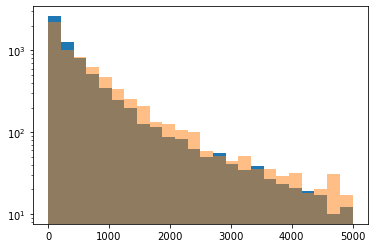

In [59]:
h = plt.hist(ge['WT_rep08'],bins=np.linspace(0,5000,25))
h = plt.hist(ge['WT_rep25'],bins=np.linspace(0,5000,25),alpha=.5)
plt.yscale('log')

/var/folders/9_/196qp2y96mn8bv8k2htffl5c0000gn/T/ipykernel_9768/4038638483.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.hist(ge.median(axis=0).values[1:])


(array([ 8.,  9., 31., 16., 11., 12.,  3.,  2.,  2.,  1.]),
 array([216. , 270.3, 324.6, 378.9, 433.2, 487.5, 541.8, 596.1, 650.4,
        704.7, 759. ]),
 <BarContainer object of 10 artists>)

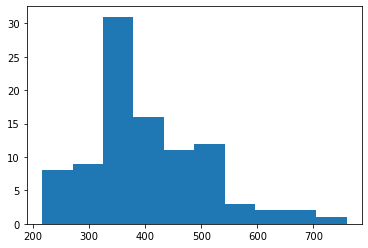

In [60]:
plt.hist(ge.median(axis=0).values[1:])

In [61]:
cols = ['WT_rep01','Snf2_rep01']

df = ge[cols].copy()

In [62]:
df['Min'] = df[cols].min(axis=1)

In [63]:
df = df[df.Min >= 100].copy()

In [64]:
df['Ratio'] = np.log2(df[cols[1]] / df[cols[0]])

(array([4.000e+00, 6.000e+00, 1.100e+01, 7.300e+01, 1.350e+02, 1.108e+03,
        3.050e+03, 4.330e+02, 8.000e+00, 1.000e+00]),
 array([-3.91499565, -3.11097634, -2.30695702, -1.50293771, -0.6989184 ,
         0.10510091,  0.90912022,  1.71313953,  2.51715884,  3.32117815,
         4.12519746]),
 <BarContainer object of 10 artists>)

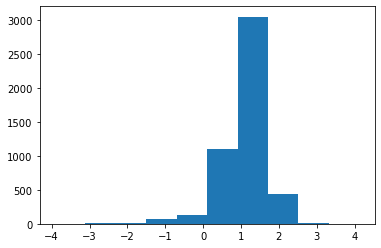

In [65]:
plt.hist(df.Ratio)

In [66]:
df.sum(axis=0)

WT_rep01      5.907184e+06
Snf2_rep01    1.005066e+07
Min           5.673856e+06
Ratio         5.330261e+03
dtype: float64

In [67]:
df['Ratio'].median()

1.178563919716185

In [68]:
np.power(2,df['Ratio'].median())

2.2635135135135136

In [69]:
ge

Gene  Snf2_rep01  Snf2_rep02  Snf2_rep03  Snf2_rep04  Snf2_rep05  \
0      15S_rRNA           4           2           5           5          46   
1      21S_rRNA          31          18          23          44         356   
2          HRA1           5           1           3           1           2   
3          ICR1         205         196         211         252         127   
4          LSR1         210         103         159         260         298   
...         ...         ...         ...         ...         ...         ...   
7121  tY(GUA)J2           1           0           0           0           0   
7122  tY(GUA)M1           0           0           1           0           2   
7123  tY(GUA)M2           0           0           0           0           0   
7124   tY(GUA)O           0           1           0           0           0   
7125   tY(GUA)Q           0           0           0           0           0   

      Snf2_rep06  Snf2_rep07  Snf2_rep08  Snf2_rep09  ...  WT_rep39  WT_rep40  \
0              3           5           4           2  ...         0        49   
1             62          35          33          13  ...        10       274   
2              1           1           4           4  ...         5         3   
3            146         275         160         190  ...        85       177   
4            522         303          96         132  ...        66       385   
...          ...         ...         ...         ...  ...       ...       ...   
7121           0           0           1           0  ...         0         0   
7122           0           0           0           0  ...         0         1   
7123           0           0           0           0  ...         0         0   
7124           0           0           0           0  ...         0         0   
7125           0           0           0           0  ...         0         0   

      WT_rep41  WT_rep42  WT_rep43  WT_rep44  WT_rep45  WT_rep46  WT_rep47  \
0            9         4        11        12         1        22        12   
1           49        30        72        58        21       159       107   
2            6         5         2         2         2         5         2   
3          137       118       113        81       142        94       187   
4          232       149       114        81       109       132       243   
...        ...       ...       ...       ...       ...       ...       ...   
7121         0         0         0         0         0         0         0   
7122         1         0         1         0         0         0         1   
7123         0         0         0         0         0         0         0   
7124         1         0         0         0         0         0         0   
7125         0         0         0         0         0         0         0   

      WT_rep48  
0            4  
1           70  
2            1  
3          106  
4          128  
...        ...  
7121         0  
7122         0  
7123         0  
7124         1  
7125         0  

[7126 rows x 97 columns]

In [79]:
cols_wt = [c for c in ge.columns if c.startswith('WT')]
cols_mut = [c for c in ge.columns if c.startswith('Snf2')]
cols_all = cols_wt + cols_mut

In [80]:
ge['mean'] = ge[cols_all].mean(axis=1)

In [81]:
df = ge[ge['mean'] >= 100]

In [82]:
df

Gene  Snf2_rep01  Snf2_rep02  Snf2_rep03  Snf2_rep04  Snf2_rep05  \
1     21S_rRNA          31          18          23          44         356   
3         ICR1         205         196         211         252         127   
4         LSR1         210         103         159         260         298   
52       RUF20         237         109         144         196         124   
56      RUF5-1         472         217         267         409         291   
...        ...         ...         ...         ...         ...         ...   
6798     snR63         134          71          73          97          82   
6820     snR82         180         113         117         200         132   
6822     snR84         153         103          79         138         108   
6824     snR86        1328         897        1063        1265         935   
6826      snR9         135         129          81         176         131   

      Snf2_rep06  Snf2_rep07  Snf2_rep08  Snf2_rep09  ...  WT_rep40  WT_rep41  \
1             62          35          33          13  ...       274        49   
3            146         275         160         190  ...       177       137   
4            522         303          96         132  ...       385       232   
52           114         273         100         154  ...       168       141   
56           377         619         301         292  ...       380       326   
...          ...         ...         ...         ...  ...       ...       ...   
6798         265         134          87         103  ...       140       105   
6820         272         191         114         151  ...       127        96   
6822          37         163          92         117  ...       123       130   
6824        1498        1757         823         869  ...      1125       776   
6826          68          87         130          96  ...       114       129   

      WT_rep42  WT_rep43  WT_rep44  WT_rep45  WT_rep46  WT_rep47  WT_rep48  \
1           30        72        58        21       159       107        70   
3          118       113        81       142        94       187       106   
4          149       114        81       109       132       243       128   
52         105       141        30       103       108       160        88   
56         197       554       102       318       198       351       350   
...        ...       ...       ...       ...       ...       ...       ...   
6798       101       106        64       130        85       161        75   
6820        67        77        29        74        52       106        67   
6822        79        96        49       147        56       134       112   
6824       593       881       437       796       653      1045       819   
6826        75        86        96       135        57       168        97   

            mean  
1     105.489583  
3     147.989583  
4     213.604167  
52    135.062500  
56    342.812500  
...          ...  
6798  104.031250  
6820  114.489583  
6822  107.979167  
6824  925.593750  
6826  110.125000  

[5346 rows x 98 columns]

In [83]:
for c in cols_all:
    mrat = np.median(df[c] / df['mean'])
    ge[c] = ge[c] / mrat

In [84]:
ge['WT_mean'] = ge[cols_wt].mean(axis=1)
ge['Snf2_mean'] = ge[cols_mut].mean(axis=1)

In [85]:
plt_data = ge[ge[cols_all].min(axis=1) > 25]

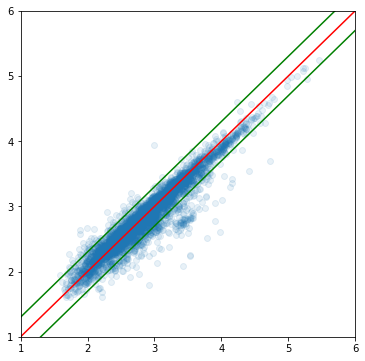

In [86]:
plt.figure(figsize=(6,6))
plt.scatter(np.log10(plt_data['WT_mean']),np.log10(plt_data['Snf2_mean']),alpha=.1)
plt.xlim(1,6)
plt.ylim(1,6)
x = np.linspace(1,6,100)
plt.plot(x,x,color='red')
plt.plot(x,x+np.log10(2),color='green')
plt.plot(x,x-np.log10(2),color='green')

In [87]:
ge.to_csv("data/barton/Barton_norm.csv",index=False)

In [102]:
ge = pd.read_csv("data/barton/Barton_norm.csv")

In [123]:
ge['exp_min'] = ge[cols_all].min(axis=1)

ge = ge[ge['exp_min'] > 0].copy()

ge['all_mean'] = ge[cols_all].mean(axis=1)
ge['wt_mean']  = ge[cols_wt].mean(axis=1)
ge['mut_mean'] = ge[cols_mut].mean(axis=1)

ge['all_std'] = ge[cols_all].std(axis=1)
ge['wt_std']  = ge[cols_wt].std(axis=1)
ge['mut_std'] = ge[cols_mut].std(axis=1)

ge['all_median'] = ge[cols_all].median(axis=1)
ge['wt_median']  = ge[cols_wt].median(axis=1)
ge['mut_median'] = ge[cols_mut].median(axis=1)

ge['true_de'] = np.log(ge['mut_median'] / ge['wt_median'])/np.log(2)
ge['abs_true_de'] = np.abs(ge['true_de'])

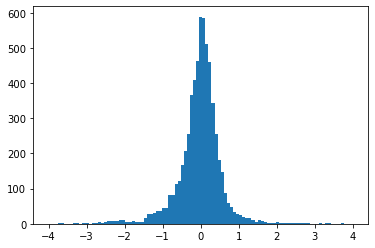

In [106]:
h = plt.hist(ge['true_de'],bins=np.linspace(-4,4,100))

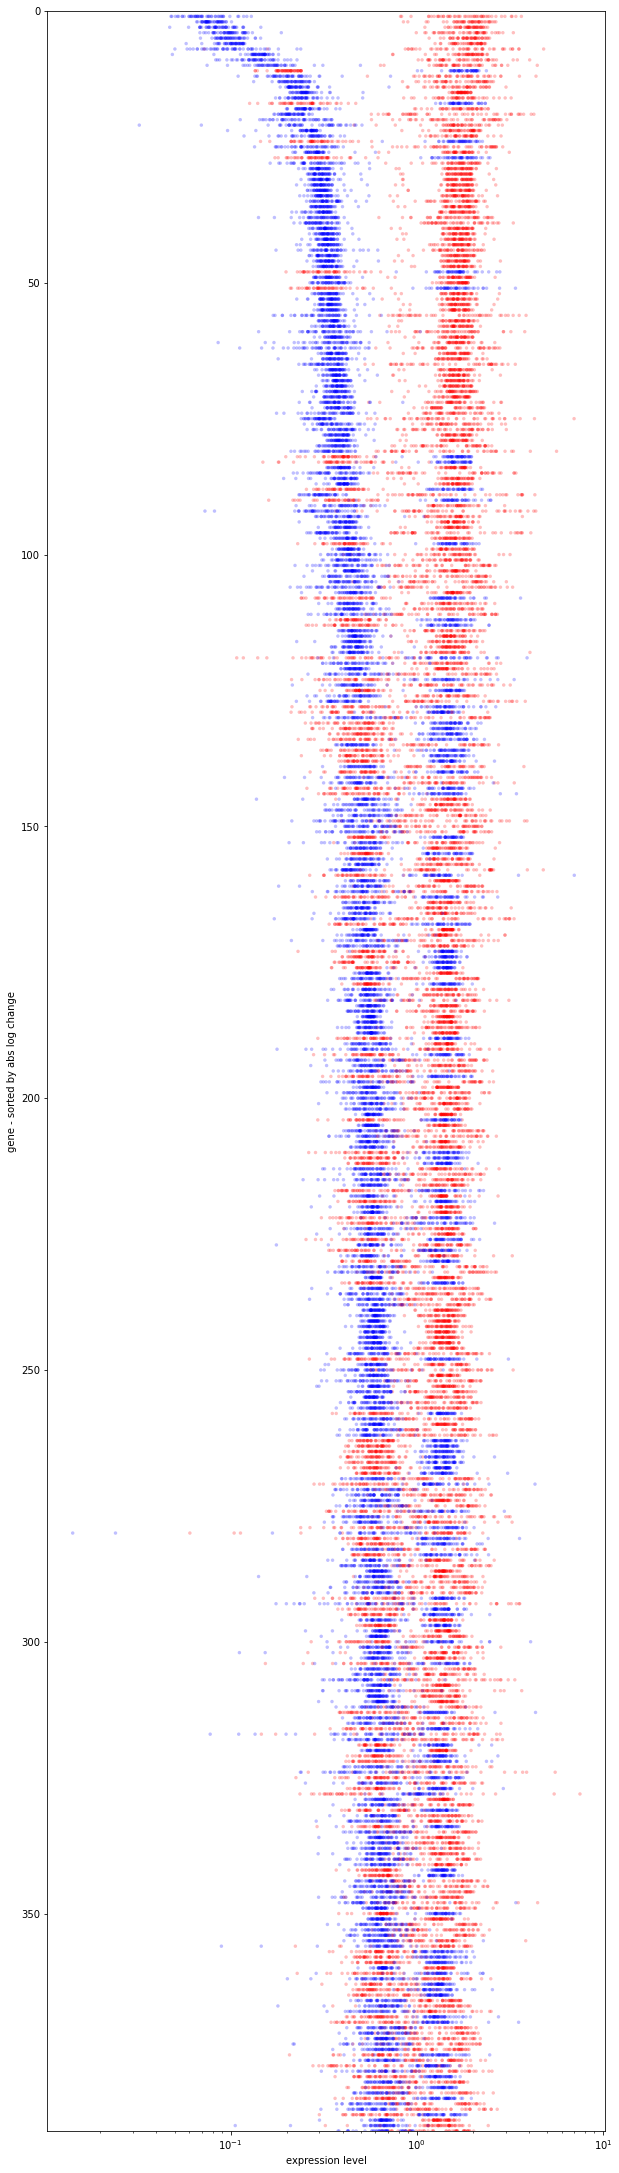

In [111]:
df = ge.copy()

df = df[df[cols_all].min(axis=1) > 10]

df = df[df['abs_true_de'] > 1]


df['abs_true_de'] = np.abs(df['true_de'])

df = df.sort_values('abs_true_de',ascending=False)

for c in cols_all:
    df[c] = df[c] / df['all_mean']
    
mut_ind = []
mut = []
wt_ind = [] 
wt = []

row = 0
for i,r in df.iterrows():
    for c in cols_mut:
        mut_ind.append(row+1)
        mut.append(r[c])
    for c in cols_wt:
        wt_ind.append(row+1)
        wt.append(r[c])
    row = row + 1
        
fig = plt.figure(figsize = (10,.1*max(wt_ind)))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(max(wt_ind + mut_ind),0)
ax.set_xscale("log", nonpositive='clip')
ax.set_xlabel("expression level")
ax.set_ylabel("gene - sorted by abs log change")
ax.scatter(wt,wt_ind,s=12,alpha=.25,c='r',edgecolor='none')
ax.scatter(mut,mut_ind,s=12,alpha=.25,c='b',edgecolor='none')

In [112]:
df

Gene  Snf2_rep01  Snf2_rep02  Snf2_rep03  Snf2_rep04  Snf2_rep05  \
2970  YHR136C    0.090162    0.089214    0.051902    0.064050    0.079173   
4802  YML123C    0.075214    0.094959    0.073848    0.070910    0.073946   
3067  YHR215W    0.083976    0.116259    0.082298    0.075703    0.076501   
1789  YER011W    0.080180    0.119850    0.115695    0.096656    0.102915   
179   YAR071W    0.108858    0.118448    0.084873    0.098514    0.102443   
...       ...         ...         ...         ...         ...         ...   
153   YAR015W    0.496037    0.676648    0.650984    0.455459    0.769249   
2673  YGR225W    1.637832    1.590706    1.536966    1.702181    1.203127   
2595  YGR155W    0.640473    0.665728    0.720903    0.644576    0.642973   
181   YAR075W    0.561555    0.599876    0.751936    0.565682    0.725712   
469   YBR142W    0.604455    0.586246    0.673954    0.652028    0.527112   

      Snf2_rep06  Snf2_rep07  Snf2_rep08  Snf2_rep09  ...    Snf2_mean  \
2970    0.048353    0.065408    0.091520    0.069735  ...    36.559135   
4802    0.082302    0.074820    0.092574    0.086434  ...   401.737940   
3067    0.047120    0.076891    0.117412    0.068307  ...   121.035827   
1789    0.187290    0.119991    0.097802    0.080654  ...   176.200299   
179     0.068918    0.093676    0.135845    0.082713  ...   176.582176   
...          ...         ...         ...         ...  ...          ...   
153     0.305561    0.426955    0.571912    0.575339  ...  1215.522688   
2673    1.693962    1.651487    1.374919    1.144136  ...    81.528923   
2595    0.300260    0.598421    0.681815    0.748210  ...  3264.090861   
181     0.105950    0.586432    0.792578    0.630175  ...   105.722583   
469     0.695487    0.628216    0.454771    0.934616  ...   282.923146   

          exp_min     all_mean      wt_mean     mut_mean   all_median  \
2970    23.349769   487.728947   938.898759    36.559135   231.007478   
4802   329.217230  5009.929718  9618.121497   401.737940  2377.414742   
3067    64.664144  1372.327333  2623.618840   121.035827   858.166672   
1789   120.346530  1758.803343  3341.406388   176.200299  1038.601644   
179    120.959987  1755.135180  3333.688183   176.582176  1150.155923   
...           ...          ...          ...          ...          ...   
153    637.512382  2086.365784  2957.208880  1215.522688  1720.181507   
2673    18.035873    60.179116    38.829310    81.528923    61.613911   
2595  1491.079080  4965.956339  6667.821818  3264.090861  4151.342017   
181     16.736602   157.966596   210.210609   105.722583   135.010544   
469    158.200891   418.942286   554.961425   282.923146   362.164272   

        wt_median   mut_median   true_de  abs_true_de  
2970   907.418871    33.970789 -4.739402     4.739402  
4802  9873.158181   387.364447 -4.671748     4.671748  
3067  2631.768223   117.205969 -4.488914     4.488914  
1789  3405.073044   172.645656 -4.301800     4.301800  
179   3333.746072   171.751663 -4.278748     4.278748  
...           ...          ...       ...          ...  
153   2448.341672  1217.040126 -1.008428     1.008428  
2673    39.316856    79.033588  1.007318     1.007318  
2595  6561.273220  3268.429310 -1.005378     1.005378  
181    212.601542   106.005253 -1.004016     1.004016  
469    557.607561   278.166983 -1.003299     1.003299  

[390 rows x 109 columns]

In [113]:
df['row'] = np.arange(0,len(df)) + 1

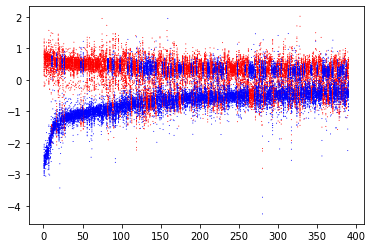

In [120]:
def color_col(col):
    if col.startswith('WT'):
        return('r')
    else:
        return('b')

    
for c in cols_all:
    plt.scatter(df['row'],np.log(df[c]),c=color_col(c),s=1,edgecolor='none')

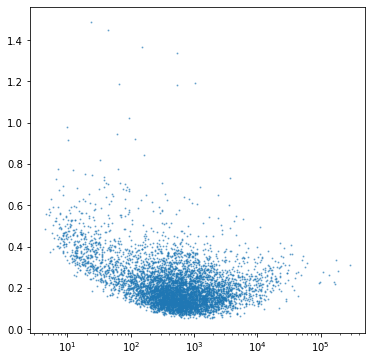

In [130]:
plt.figure(figsize=(6,6))
plt.scatter(ge['wt_mean'],ge['wt_std']/ge['wt_mean'],s=1,alpha=.5)
plt.xscale('log')

In [136]:
import random

In [140]:
random.sample(cols_wt,5)

['WT_rep35', 'WT_rep23', 'WT_rep05', 'WT_rep16', 'WT_rep15']

In [144]:
wt_1 = random.sample(cols_wt,3)
wt_2 = random.sample(cols_wt,3)

ge['wt1_mean'] = ge[wt_1].mean(axis=1)
ge['wt2_mean'] = ge[wt_2].mean(axis=1)

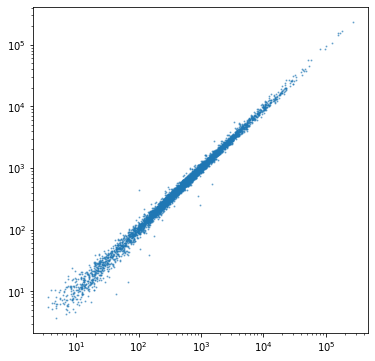

In [145]:
plt.figure(figsize=(6,6))
plt.scatter(ge['wt1_mean'],ge['wt2_mean'],s=1,alpha=.5)
plt.xscale('log')
plt.yscale('log')

In [149]:
import scipy
import scipy.stats
from scipy.stats import ks_2samp

In [151]:
def rowks(sample1,sample2):
    return scipy.stats.ks_2samp(sample1,sample2).pvalue    

ge['ks-p'] = ge.apply(lambda row: rowks(row[cols_wt],row[cols_mut]), axis=1)

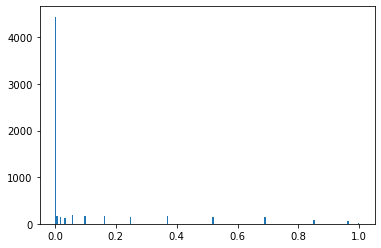

In [154]:
h = plt.hist(ge['ks-p'],bins=np.linspace(0,1,200))

In [155]:
pcut = .05 / len(ge)

In [156]:
pcut

8.156606851549756e-06

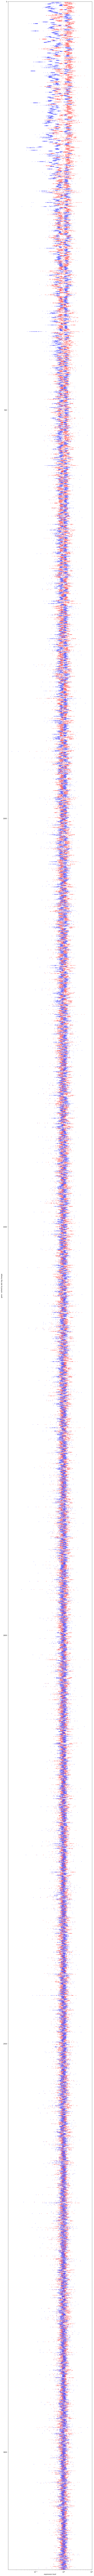

In [157]:
df = ge.copy()

df = df[df[cols_all].min(axis=1) > 10]

df = df[df['ks-p'] < pcut]

df = df.sort_values('ks-p',ascending=True)

for c in cols_all:
    df[c] = df[c] / df['all_mean']
    
mut_ind = []
mut = []
wt_ind = [] 
wt = []

row = 0
for i,r in df.iterrows():
    for c in cols_mut:
        mut_ind.append(row+1)
        mut.append(r[c])
    for c in cols_wt:
        wt_ind.append(row+1)
        wt.append(r[c])
    row = row + 1
        
fig = plt.figure(figsize = (10,.1*max(wt_ind)))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(max(wt_ind + mut_ind),0)
ax.set_xscale("log", nonpositive='clip')
ax.set_xlabel("expression level")
ax.set_ylabel("gene - sorted by abs log change")
ax.scatter(wt,wt_ind,s=12,alpha=.25,c='r',edgecolor='none')
ax.scatter(mut,mut_ind,s=12,alpha=.25,c='b',edgecolor='none')

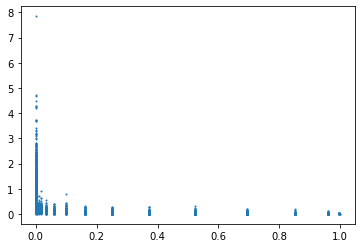

In [159]:
plt.scatter(ge['ks-p'],ge['abs_true_de'],s=1)

In [164]:
def rowks(sample1,sample2):
    return scipy.stats.ks_2samp(sample1,sample2).pvalue    

ge['ks-p-wt'] = ge.apply(lambda row: rowks(row[cols_wt[0:24]],row[cols_mut[24:48]]), axis=1)

In [169]:
x = []
y = []

for sample_size in [3,5,10,15,20,30,40]:
    for trials in np.arange(0,10):
        
        wt_sam = np.random.choice(cols_wt,sample_size,replace=False)
        mut_sam = np.random.choice(cols_mut,sample_size,replace=False)
        
        ge['ks-p-wt'] = ge.apply(lambda row: rowks(row[wt_sam],row[mut_sam]), axis=1)
        x.append(sample_size)
        y.append(len(ge[ge['ks-p-wt'] < pcut]))
    

KeyboardInterrupt: 

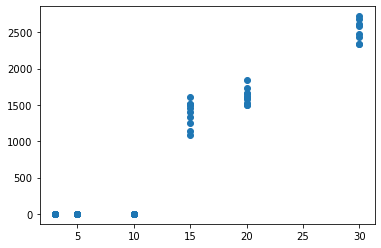

In [170]:
plt.scatter(x,y)

In [171]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1507,
 1333,
 1245,
 1451,
 1145,
 1503,
 1084,
 1612,
 1396,
 1508,
 1733,
 1613,
 1841,
 1657,
 1532,
 1582,
 1603,
 1645,
 1504,
 1505,
 2343,
 2477,
 2684,
 2339,
 2430,
 2578,
 2606,
 2719]

In [ ]:
np.random.choice(cols_wt,replace=False)

(array([4692.,  301.,  314.,    0.,  317.,    0.,  264.,    0.,    0.,
         242.]),
 array([6.20201122e-14, 9.99999480e-02, 1.99999896e-01, 2.99999844e-01,
        3.99999792e-01, 4.99999740e-01, 5.99999688e-01, 6.99999636e-01,
        7.99999584e-01, 8.99999532e-01, 9.99999480e-01]),
 <BarContainer object of 10 artists>)

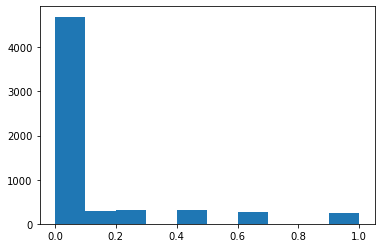

In [165]:
plt.hist(ge['ks-p-wt'])

In [162]:
from collections import Counter

In [163]:
Counter(ge['ks-p-wt'])

Counter({0.9024001944012529: 1784,
         0.011965431606262756: 10,
         0.994161229482218: 824,
         0.686017125117228: 1589,
         0.4490368220409109: 986,
         0.26283384201555077: 520,
         0.06780335175136987: 78,
         0.13982257948893737: 255,
         0.9999994797375902: 49,
         0.029913567122680163: 27,
         0.00432085032746239: 8})